In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install datasets



In [ ]:
# Download the GoEmotions dataset
from datasets import load_dataset

ds = load_dataset("google-research-datasets/go_emotions", "simplified")

In [ ]:
import pandas as pd

# Access dataset splits
df_train = pd.DataFrame(ds['train'])
df_val = pd.DataFrame(ds['validation'])
df_test = pd.DataFrame(ds['test'])

# Save to Google Drive
save_dir = "/content/drive/MyDrive/Dissertation/Data/"
df_train.to_csv(save_dir + "train.tsv", sep='\t', index=False, header=False)
df_val.to_csv(save_dir + "val.tsv", sep='\t', index=False, header=False)
df_test.to_csv(save_dir + "test.tsv", sep='\t', index=False, header=False)

print("TSV files saved to Google Drive.")


TSV files saved to Google Drive.


EDA

In [ ]:
# Importing the files
df_train = pd.read_csv('/content/drive/MyDrive/Dissertation/Data/train.tsv', sep='\t', header=None, names=['Text', 'Emotion_indices', 'Id']).drop('Id', axis=1)
df_val = pd.read_csv('/content/drive/MyDrive/Dissertation/Data/val.tsv', sep='\t', header=None, names=['Text', 'Emotion_indices', 'Id']).drop('Id', axis=1)
df_test = pd.read_csv('/content/drive/MyDrive/Dissertation/Data/test.tsv', sep='\t', header=None, names=['Text', 'Emotion_indices', 'Id']).drop('Id', axis=1)

# Preview of data
display(df_train.head())

,Text,Emotion_indices
0,My favourite food is anything I didn't have to...,27
1,"Now if he does off himself, everyone will thin...",27
2,WHY THE FUCK IS BAYLESS ISOING,2
3,To make her feel threatened,14
4,Dirty Southern Wankers,3


In [ ]:
# Display information about data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             43410 non-null  object
 1   Emotion_indices  43410 non-null  object
dtypes: object(2)
memory usage: 678.4+ KB


In [ ]:
# Define the number of samples in train, validation and test dataset
train_size = df_train.shape[0]
val_size= df_val.shape[0]
test_size = df_test.shape[0]

# Define the total number of samples
Total_size = train_size + val_size + test_size

In [ ]:
# Shape of train, validation and test datasets
print("Number of samples in Train data:", train_size)
print("\nNumber of samples in Validation data:", val_size)
print("\nNumber of samples in Test data:", test_size)
print("\nThe total number of samples:", Total_size)

print("\n\nThe number of samples in Train data represents {:.2f}% of overall data".format(train_size/Total_size*100))
print("\nThe number of samples in Validation data represents {:.2f}% of overall data".format(val_size/Total_size*100))
print("\nThe number of samples in Test data represents {:.2f}% of overall data".format(test_size/Total_size*100))


Number of samples in Train data: 43410

Number of samples in Validation data: 5426

Number of samples in Test data: 5427

The total number of samples: 54263


The number of samples in Train data represents 80.00% of overall data

The number of samples in Validation data represents 10.00% of overall data

The number of samples in Test data represents 10.00% of overall data


In [ ]:
# Loading emotion labels
with open("/content/drive/MyDrive/Dissertation/Data/emotions.txt", "r") as file:
    Emotions = file.read().split("\n")

for emo in Emotions:
    print(emo)

# Number of emotions
print("\nThere are {} emotions in the dataset including 'Neutral'".format(len(Emotions)))

admiration
amusement
anger
annoyance
approval
caring
confusion
curiosity
desire
disappointment
disapproval
disgust
embarrassment
excitement
fear
gratitude
grief
joy
love
nervousness
optimism
pride
realization
relief
remorse
sadness
surprise
neutral

There are 28 emotions in the dataset including 'Neutral'


**OneHot encoding for multi-label classification**

In [ ]:
# Concatenating the 3 datasets for labels preprocessing
GoEmotions_df = pd.concat([df_train, df_val, df_test], axis=0).reset_index(drop=True)

# Preview of data
display(GoEmotions_df.head(3))

print(GoEmotions_df.shape)

,Text,Emotion_indices
0,My favourite food is anything I didn't have to...,27
1,"Now if he does off himself, everyone will thin...",27
2,WHY THE FUCK IS BAYLESS ISOING,2


(54263, 2)


In [ ]:
# Convert emotion indices into a list of indices
GoEmotions_df['Emotion_indices'] = GoEmotions_df['Emotion_indices'] .apply(lambda x: x.split(','))

# Preview of data
display(GoEmotions_df.head(3))

,Text,Emotion_indices
0,My favourite food is anything I didn't have to...,[27]
1,"Now if he does off himself, everyone will thin...",[27]
2,WHY THE FUCK IS BAYLESS ISOING,[2]


In [ ]:
# Defining a function that maps each index to emotion labels
def idx2class(idx_list):
    arr = []
    for i in idx_list:
        arr.append(Emotions[int(i)])
    return arr

# Applying the function
GoEmotions_df['Emotion_labels'] = GoEmotions_df['Emotion_indices'].apply(idx2class)

# Preview of data
display(GoEmotions_df.head(3))

,Text,Emotion_indices,Emotion_labels
0,My favourite food is anything I didn't have to...,[27],[neutral]
1,"Now if he does off himself, everyone will thin...",[27],[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],[anger]


In [ ]:
import numpy as np

# Preview of data
for emo in Emotions:
    GoEmotions_df[emo] = np.zeros((len(GoEmotions_df),1))
    GoEmotions_df[emo] = GoEmotions_df['Emotion_labels'].apply(lambda x: 1 if emo in x else 0)


display(GoEmotions_df.head(3))

,Text,Emotion_indices,Emotion_labels,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,[27],[neutral],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",[27],[neutral],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,[2],[anger],0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Keep only the necessary columns
GoEmotions_df = GoEmotions_df.drop(['Emotion_indices','Emotion_labels'], axis=1)

# Display the first 3 rows
display(GoEmotions_df.head(3))

,Text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text preprocessing

Text is preprocessed to handle emojis, contractions, acronyms, special characters, etc.

In [ ]:
# Installing libraries for text preprocessing
!pip install emoji
!pip install contractions

# Text processing libraries
import emoji
import re
import contractions
from collections import Counter
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re

# Creating a preprocessing function to clean text
def preprocess_text(x):

  # Adding a space between words and punctation
  x = re.sub( r'([a-zA-Z])([,;.!?])', r'\1 \2', x)
  x = re.sub( r'([,;.!?])([a-zA-Z])', r'\1 \2', x)

  # Demojize
  x = emoji.demojize(x)

  # Expand contraction
  x = contractions.fix(x)

  # Lower
  x = x.lower()

  #correct some acronyms/typos/abbreviations
  x = re.sub(r"lmao", "laughing my ass off", x)
  x = re.sub(r"amirite", "am i right", x)
  x = re.sub(r"\b(tho)\b", "though", x)
  x = re.sub(r"\b(ikr)\b", "i know right", x)
  x = re.sub(r"\b(ya|u)\b", "you", x)
  x = re.sub(r"\b(eu)\b", "europe", x)
  x = re.sub(r"\b(da)\b", "the", x)
  x = re.sub(r"\b(dat)\b", "that", x)
  x = re.sub(r"\b(dats)\b", "that is", x)
  x = re.sub(r"\b(cuz)\b", "because", x)
  x = re.sub(r"\b(fkn)\b", "fucking", x)
  x = re.sub(r"\b(tbh)\b", "to be honest", x)
  x = re.sub(r"\b(tbf)\b", "to be fair", x)
  x = re.sub(r"faux pas", "mistake", x)
  x = re.sub(r"\b(btw)\b", "by the way", x)
  x = re.sub(r"\b(bs)\b", "bullshit", x)
  x = re.sub(r"\b(kinda)\b", "kind of", x)
  x = re.sub(r"\b(bruh)\b", "bro", x)
  x = re.sub(r"\b(w/e)\b", "whatever", x)
  x = re.sub(r"\b(w/)\b", "with", x)
  x = re.sub(r"\b(w/o)\b", "without", x)
  x = re.sub(r"\b(doj)\b", "department of justice", x)

  #replace some words with multiple occurences of a letter, example "coooool" turns into --> cool
  x = re.sub(r"\b(j+e{2,}z+e*)\b", "jeez", x)
  x = re.sub(r"\b(co+l+)\b", "cool", x)
  x = re.sub(r"\b(g+o+a+l+)\b", "goal", x)
  x = re.sub(r"\b(s+h+i+t+)\b", "shit", x)
  x = re.sub(r"\b(o+m+g+)\b", "omg", x)
  x = re.sub(r"\b(w+t+f+)\b", "wtf", x)
  x = re.sub(r"\b(w+h+a+t+)\b", "what", x)
  x = re.sub(r"\b(y+e+y+|y+a+y+|y+e+a+h+)\b", "yeah", x)
  x = re.sub(r"\b(w+o+w+)\b", "wow", x)
  x = re.sub(r"\b(w+h+y+)\b", "why", x)
  x = re.sub(r"\b(s+o+)\b", "so", x)
  x = re.sub(r"\b(f)\b", "fuck", x)
  x = re.sub(r"\b(w+h+o+p+s+)\b", "whoops", x)
  x = re.sub(r"\b(ofc)\b", "of course", x)
  x = re.sub(r"\b(the us)\b", "usa", x)
  x = re.sub(r"\b(gf)\b", "girlfriend", x)
  x = re.sub(r"\b(hr)\b", "human ressources", x)
  x = re.sub(r"\b(mh)\b", "mental health", x)
  x = re.sub(r"\b(idk)\b", "i do not know", x)
  x = re.sub(r"\b(gotcha)\b", "i got you", x)
  x = re.sub(r"\b(y+e+p+)\b", "yes", x)
  x = re.sub(r"\b(a*ha+h[ha]*|a*ha +h[ha]*)\b", "haha", x)
  x = re.sub(r"\b(o?l+o+l+[ol]*)\b", "lol", x)
  x = re.sub(r"\b(o*ho+h[ho]*|o*ho +h[ho]*)\b", "ohoh", x)
  x = re.sub(r"\b(o+h+)\b", "oh", x)
  x = re.sub(r"\b(a+h+)\b", "ah", x)
  x = re.sub(r"\b(u+h+)\b", "uh", x)

  # Handling emojis
  x = re.sub(r"<3", " love ", x)
  x = re.sub(r"xd", " smiling_face_with_open_mouth_and_tightly_closed_eyes ", x)
  x = re.sub(r":\)", " smiling_face ", x)
  x = re.sub(r"^_^", " smiling_face ", x)
  x = re.sub(r"\*_\*", " star_struck ", x)
  x = re.sub(r":\(", " frowning_face ", x)
  x = re.sub(r":\^\(", " frowning_face ", x)
  x = re.sub(r";\(", " frowning_face ", x)
  x = re.sub(r":\/",  " confused_face", x)
  x = re.sub(r";\)",  " wink", x)
  x = re.sub(r">__<",  " unamused ", x)
  x = re.sub(r"\b([xo]+x*)\b", " xoxo ", x)
  x = re.sub(r"\b(n+a+h+)\b", "no", x)

  # Handling special cases of text
  x = re.sub(r"h a m b e r d e r s", "hamberders", x)
  x = re.sub(r"b e n", "ben", x)
  x = re.sub(r"s a t i r e", "satire", x)
  x = re.sub(r"y i k e s", "yikes", x)
  x = re.sub(r"s p o i l e r", "spoiler", x)
  x = re.sub(r"thankyou", "thank you", x)
  x = re.sub(r"a^r^o^o^o^o^o^o^o^n^d", "around", x)

  # Replace sequences of dots with " dots "
  x = re.sub(r"[.]{3,}", " dots ", x)
  # Remove all special characters and numbers, replacing with a space
  x = re.sub(r"[^A-Za-z\s]", " ", x)
  # Remove isolated single 's' (if any) with a space around them
  x = re.sub(r"\b(s)\b", "", x)
  # Replace multiple spaces with a single space
  x = re.sub(r"\s+", " ", x)
  # Strip leading and trailing whitespace
  x = x.strip()

  return x


In [ ]:
# Applying the preprocessing function on the dataset
GoEmotions_df["Clean_text"] = GoEmotions_df["Text"].apply(preprocess_text)

# Preview of data
display(GoEmotions_df[['Text', 'Clean_text']].sample(5))


,Text,Clean_text
30215,I was wondering if that would happen. The stor...,i was wondering if that would happen the story...
34088,Yeah it's like there's no difference between a...,yeah it is like there is no difference between...
45367,"You just told a bunch of random people, I thin...",you just told a bunch of random people i think...
47676,Nice Sir !,nice sir
39365,Don't like having different stripe profiles on...,do not like having different stripe profiles o...


In [ ]:
# Dropping text column and keeping Clean_text only
GoEmotions_df = GoEmotions_df[ ['Clean_text'] + [ col for col in GoEmotions_df.columns if col not in ['Text', 'Clean_text'] ] ]

# Preview of data
display(GoEmotions_df.head(3))

,Clean_text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,my favourite food is anything i did not have t...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,now if he does off himself everyone will think...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,why the fuck is bayless isoing,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 Again Splitting into Train, Validation and Test datasets

In [ ]:
# Building a function that will divide in train, validation and test sets
def get_train_val_test(df):
    train = df.iloc[:train_size, :]
    val = df.iloc[train_size:train_size+val_size, :]
    test = df.iloc[train_size+val_size:train_size+val_size+test_size, :]
    return train, val, test


In [ ]:
# Dividing back in train, validation and test datasets
GE_train, GE_val, GE_test= get_train_val_test(GoEmotions_df)
print(GE_train.shape)
print(GE_val.shape)
print(GE_test.shape)

(43410, 29)
(5426, 29)
(5427, 29)


Labels analysis

1.  Number of emotions per sample in the dataset

In [ ]:
# Computing the number of labels for each sample
GE_train['Cardinality'] = GE_train.loc[:, Emotions].apply(lambda x: sum(x), axis=1)

# Preview of data
display(GE_train.head(3))

<ipython-input-86-9f515a908f83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GE_train['Cardinality'] = GE_train.loc[:, Emotions].apply(lambda x: sum(x), axis=1)


,Clean_text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Cardinality
0,my favourite food is anything i did not have t...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,now if he does off himself everyone will think...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,why the fuck is bayless isoing,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Possible number of emotions per sample in dataset
GE_train['Cardinality'].value_counts()

,count
Cardinality,
1,36308
2,6541
3,532
4,28
5,1


Each sample is associated with 1 to 5 emotions, with the majority of samples containing just 1 or 2 emotions.

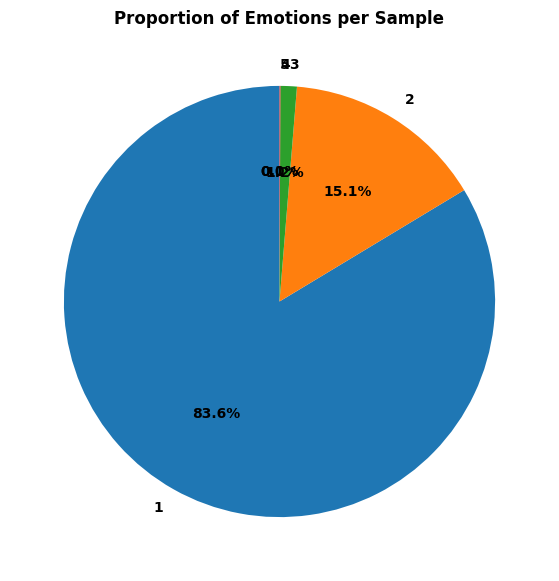

In [92]:
import matplotlib.pyplot as plt

# Get the cardinality counts
cardinality_counts = GE_train['Cardinality'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 7))
plt.pie(cardinality_counts, labels=cardinality_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold'})

# Add a title
plt.title("Proportion of Emotions per Sample", fontweight='bold')

# Display the pie chart
plt.show()


2 - Number of samples per emotion in the dataset

In [ ]:
# Computing number of samples per emotion
classes_GE_count = GE_train.loc[:,Emotions].sum(axis=0).sort_values(ascending=False)

<ipython-input-97-7fb85a8bc14f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


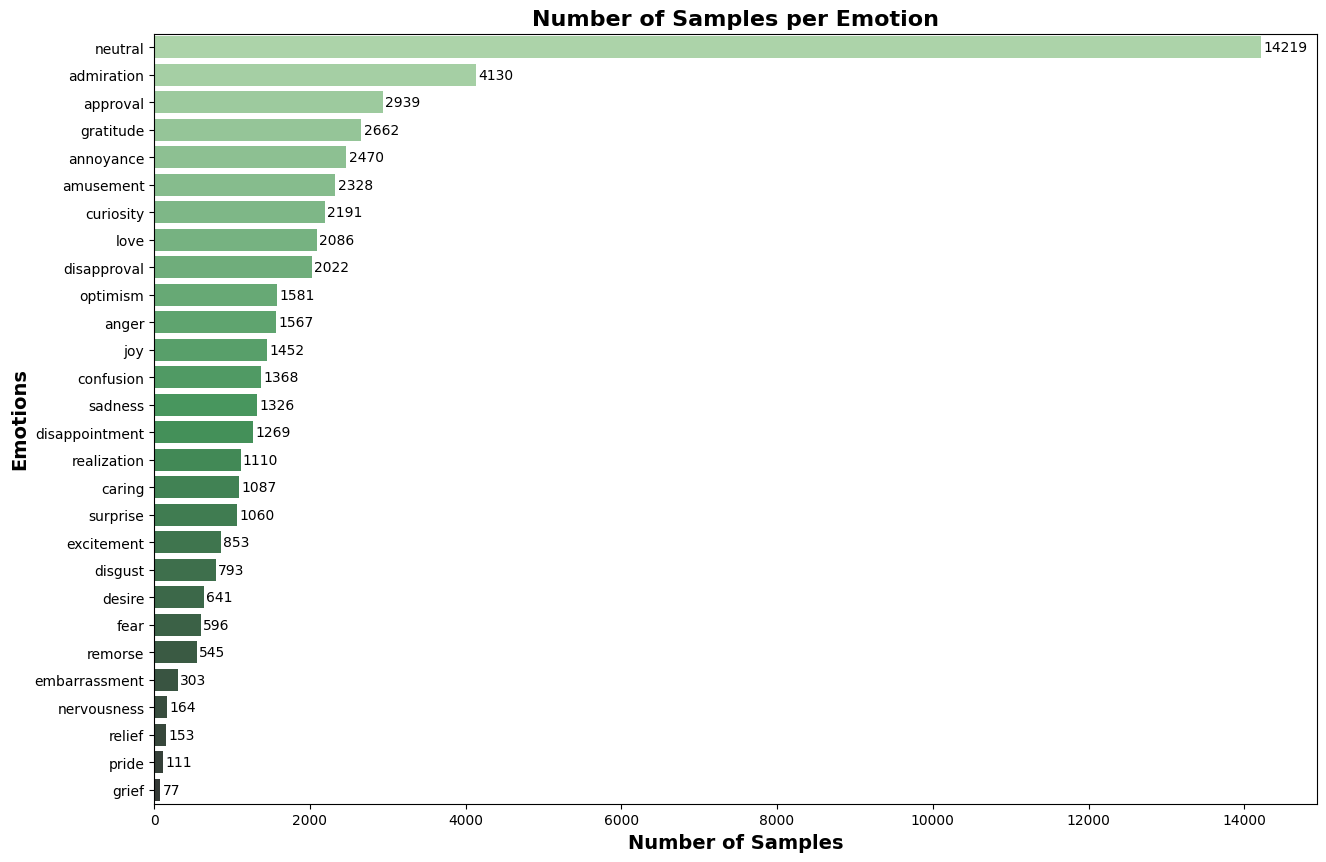

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the number of samples per class
plt.figure(figsize=(15, 10))

# Explicitly passing the palette without hue
ax = sns.barplot(
    x=classes_GE_count.values,
    y=classes_GE_count.index,
    orient='h',
    palette=sns.color_palette("Greens_d", len(classes_GE_count))
)

# Annotate bar values
for p in ax.patches:
    value = int(p.get_width())
    x = p.get_x() + p.get_width() + 30
    y = p.get_y() + p.get_height() / 2
    ax.annotate(value, (x, y), va='center', fontsize=10)

# Titles and labels
plt.title("Number of Samples per Emotion", fontweight='bold', fontsize=16)
plt.ylabel("Emotions", fontweight='bold', fontsize=14)
plt.xlabel("Number of Samples", fontweight='bold', fontsize=14)

# Show the plot
plt.show()


From the graph it is evident that almost 30% of samples are labelled 'Neutral' and only 77 samples have the 'grief' label.

3 - Classe balance in train, validation and test datasets

 Compute the proportion of emotions in each dataset

In [99]:
# Defining classes representation for each dataset (GoEmotions)
GE_train_count = (GE_train.loc[:, Emotions].sum(axis=0) / train_size)*100
GE_val_count = (GE_val.loc[:, Emotions].sum(axis=0) / val_size)*100
GE_test_count= (GE_test.loc[:, Emotions].sum(axis=0) / test_size)*100

# Constructing a unique dataset for visualization purposes
balance_GE = pd.DataFrame(data=[GE_train_count, GE_val_count, GE_test_count]).T.reset_index(drop=False)
balance_GE.columns = ['Emotion', 'Train', 'Validation', 'Test']
balance_GE = balance_GE.sort_values('Train', ascending=False)
balance_GE = balance_GE.melt(id_vars='Emotion', var_name='Dataset', value_vars=['Train','Validation', 'Test'], value_name='Percentage')

# Preview of data
display(balance_GE.head())

,Emotion,Dataset,Percentage
0,neutral,Train,32.755126
1,admiration,Train,9.513937
2,approval,Train,6.770329
3,gratitude,Train,6.132228
4,annoyance,Train,5.689933


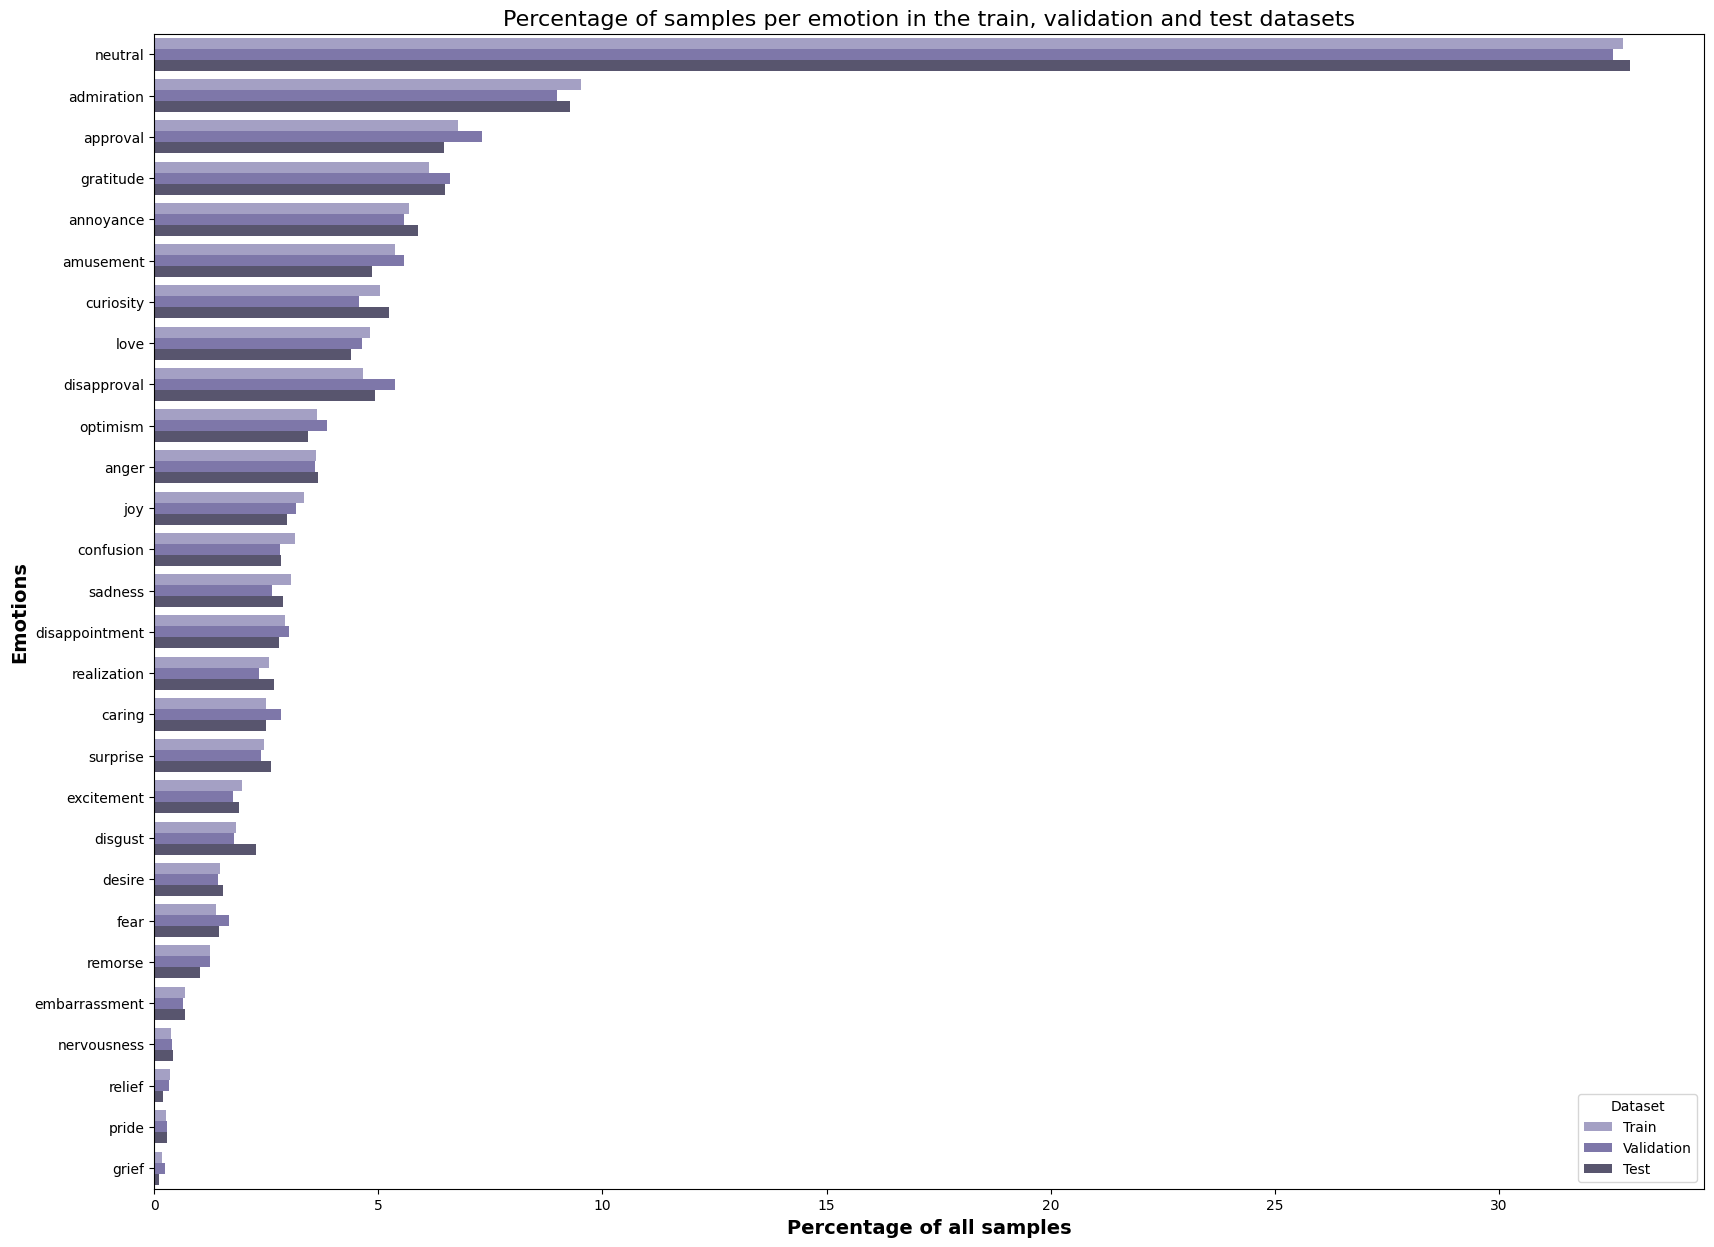

In [111]:
# Visualization of Class balance

plt.figure(figsize=(20,15))
sns.barplot(x='Percentage', y='Emotion', data=balance_GE, orient='h', hue='Dataset', palette="Purples_d")
plt.title("Percentage of samples per emotion in the train, validation and test datasets", fontsize=16)
plt.ylabel("Emotions", fontsize=14, fontweight='bold')
plt.xlabel("Percentage of all samples", fontsize=14, fontweight='bold')
plt.show()

As observed, the proportions of emotions are consistent across the training, validation, and test datasets.

**Words analysis**

Top 5 words per emotion

In [104]:
# Function to display 5 most frequent words in a series of comments
def plot_frequent_words(comments, axes):

    comments = comments.str.split() # split each comment into a list of words
    comments = comments.values.tolist() # from pandas series to lists of words
    corpus = [word for sample in comments for word in sample if word not in list(STOP_WORDS)+["?","!","name"]] # giant corpus of words excluding special characters
    counter = Counter(corpus) # create a counter
    most = counter.most_common(5) # retrieve the 5 most frequent words

    # Plot the 10 top words and their frequencies
    most = [(word, count) for (word, count) in most]
    x, y = [], []
    for word, count in most[:5]:
      x.append(word)
      y.append(count)
    sns.barplot(x=y, y=x , ax=axes, palette="Set2")

<ipython-input-104-ee51e98a027f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x , ax=axes, palette="Set2")
<ipython-input-104-ee51e98a027f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x , ax=axes, palette="Set2")
<ipython-input-104-ee51e98a027f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x , ax=axes, palette="Set2")
<ipython-input-104-ee51e98a027f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend

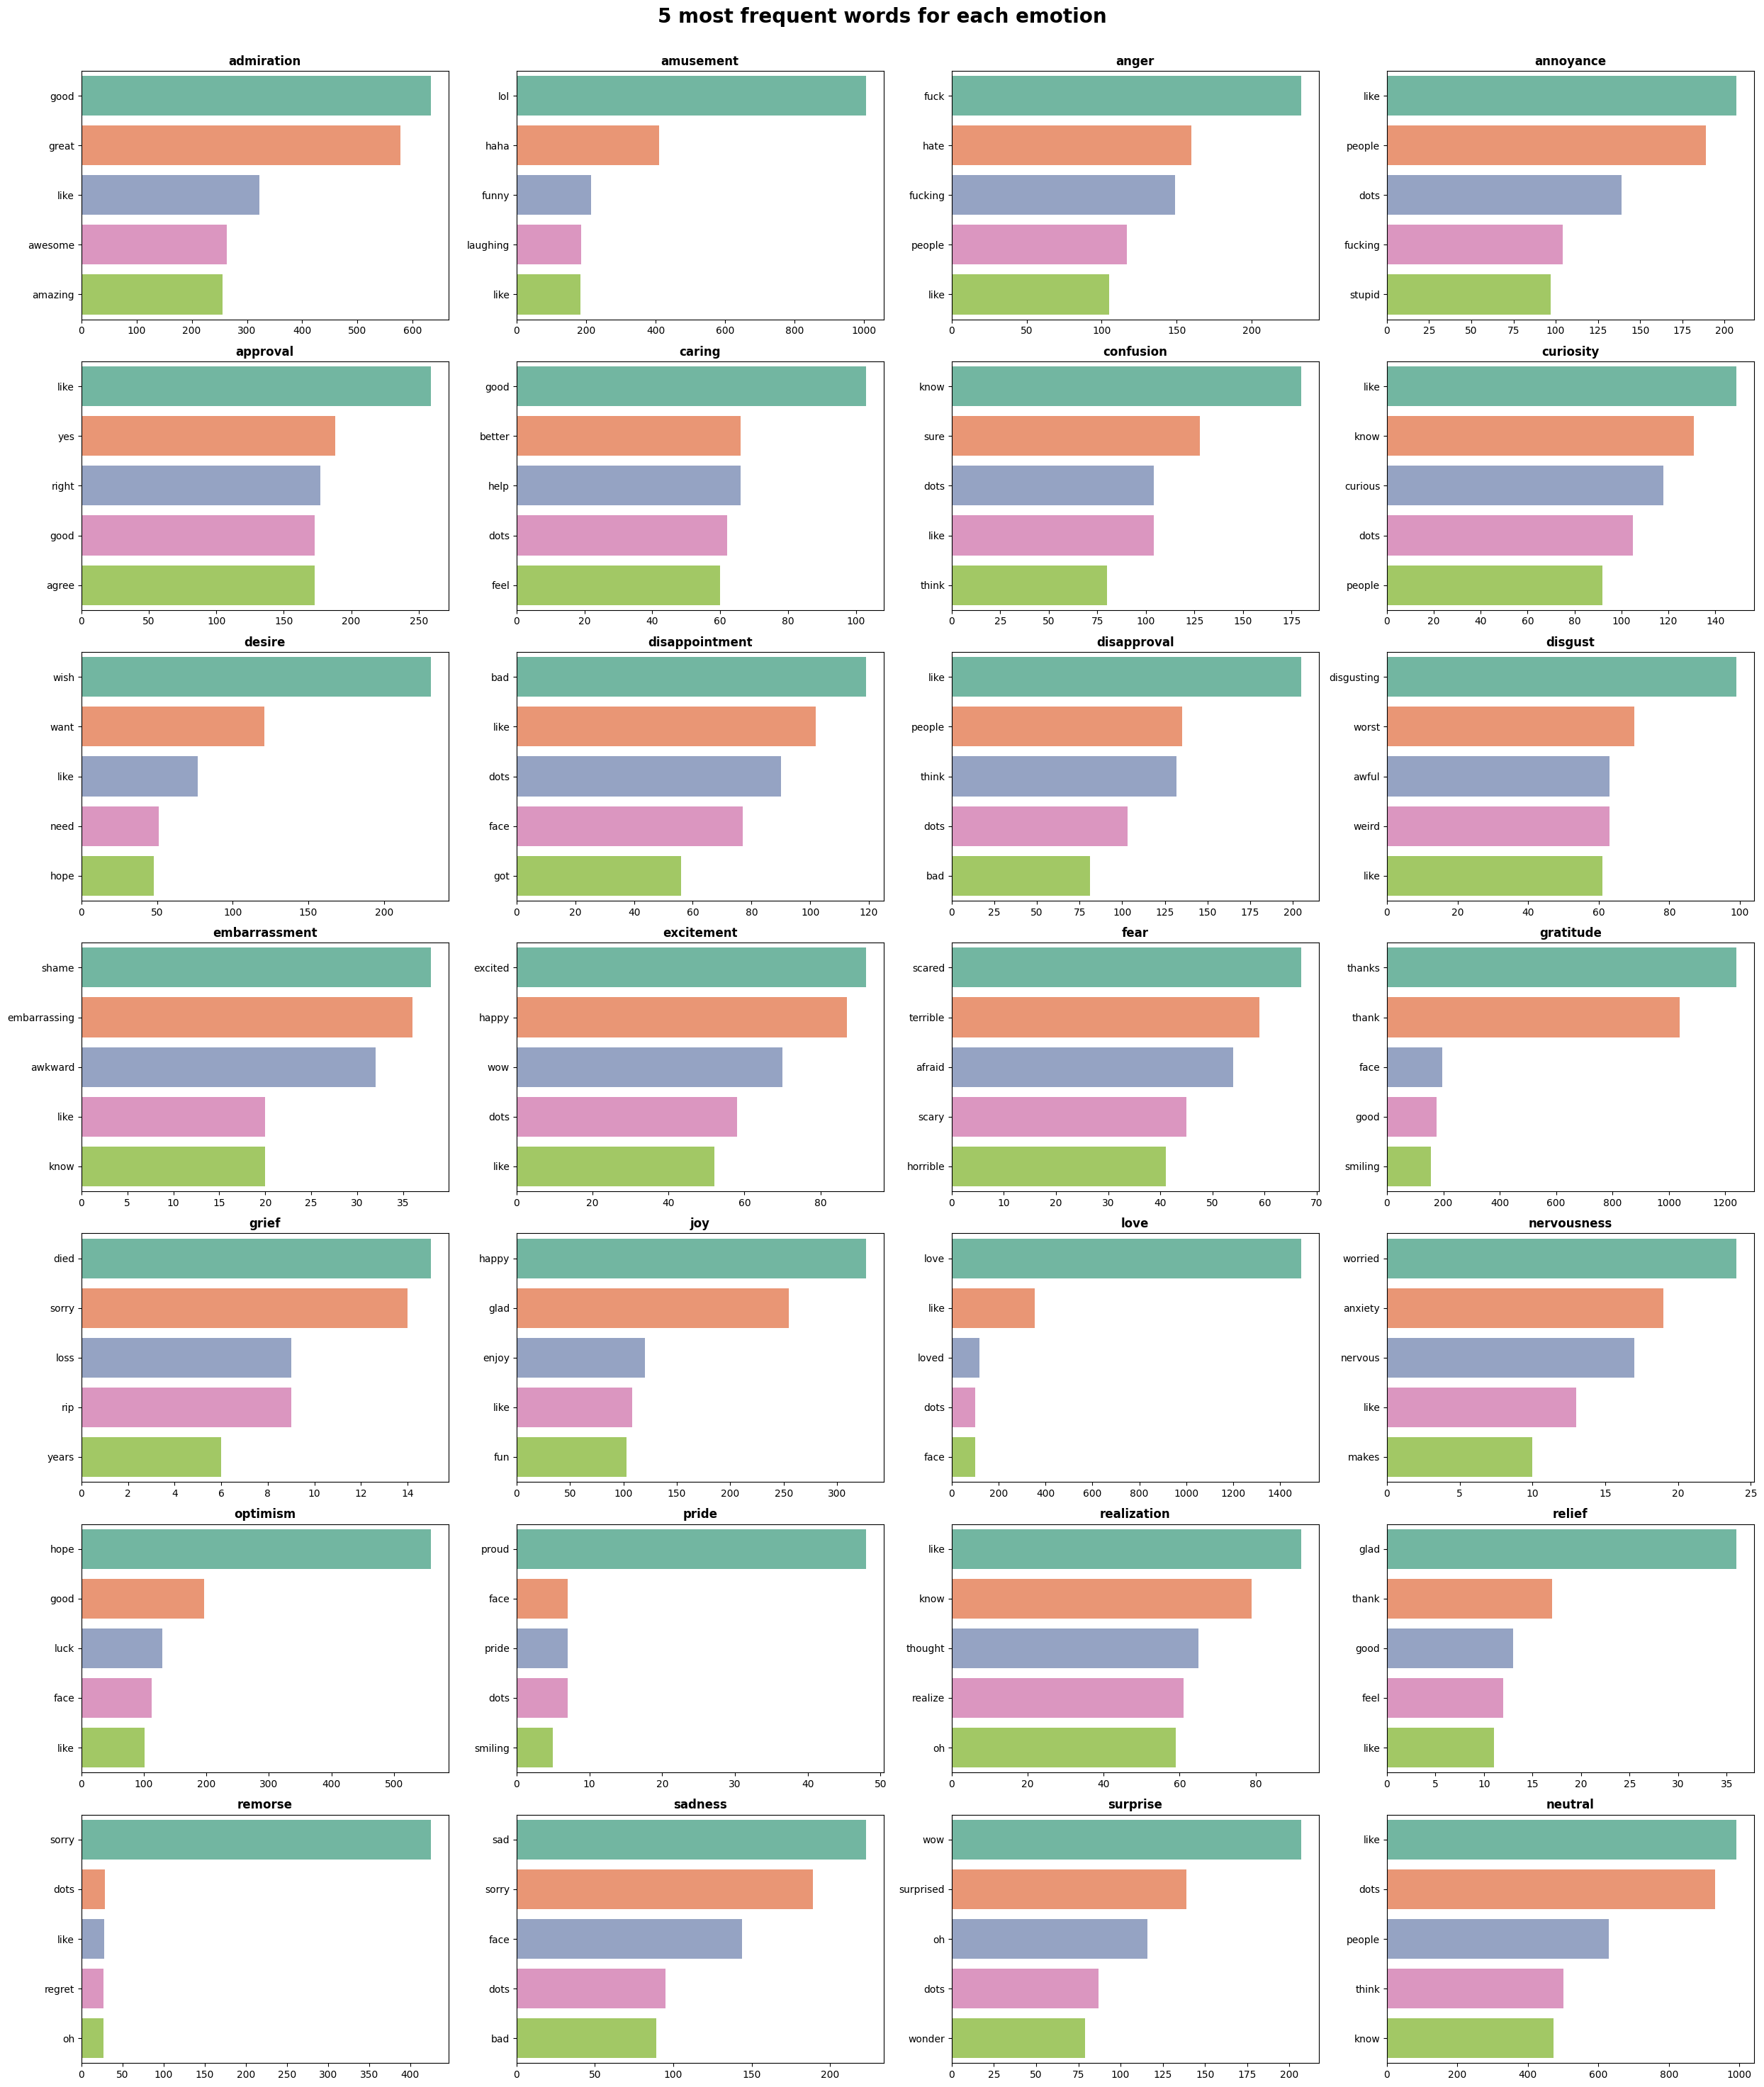

In [107]:
# Displaying 5 most frequent words for each emotion
fig, axes = plt.subplots(7, 4, figsize=(25, 30))
fig.suptitle('5 most frequent words for each emotion', fontweight="bold", fontsize=20)

for i, axi in enumerate(axes.flat):
    plot_frequent_words(GE_train.loc[GE_train[Emotions[i]]==1,"Clean_text"], axi)
    axi.set_title(Emotions[i], fontweight="bold")

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()